In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb7e913b60509fb0b1fc7097ce6c2652


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [32]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
   # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kogon
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | severo-kurilsk
Processing Record 6 of Set 1 | norman wells
Processing Record 7 of Set 1 | arman
Processing Record 8 of Set 1 | gamba
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | yenagoa
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | ringebu
Processing Record 14 of Set 1 | formoso do araguaia
City not found. Skipping...
Processing Record 15 of Set 1 | bollnas
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | gat
Processing Record 19 of Set 1 | esperance
Processing Record 20 of Set 1 | zhigansk
Processing Record 21 of Set 1 | bethanien
Processing Record 22

Processing Record 38 of Set 4 | takoradi
Processing Record 39 of Set 4 | bosaso
Processing Record 40 of Set 4 | kahului
Processing Record 41 of Set 4 | wukari
Processing Record 42 of Set 4 | salaga
Processing Record 43 of Set 4 | longyearbyen
Processing Record 44 of Set 4 | mareeba
Processing Record 45 of Set 4 | formosa
Processing Record 46 of Set 4 | turhal
Processing Record 47 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 48 of Set 4 | monmouth
Processing Record 49 of Set 4 | bartlesville
Processing Record 50 of Set 4 | upernavik
Processing Record 1 of Set 5 | trois-rivieres
Processing Record 2 of Set 5 | talnakh
Processing Record 3 of Set 5 | saskylakh
Processing Record 4 of Set 5 | cayenne
Processing Record 5 of Set 5 | baykit
Processing Record 6 of Set 5 | provideniya
Processing Record 7 of Set 5 | airai
Processing Record 8 of Set 5 | tobol
Processing Record 9 of Set 5 | high level
Processing Record 10 of Set 5 | jamestown
Processing Record 11 of Set 5 | la ro

Processing Record 31 of Set 8 | grindavik
Processing Record 32 of Set 8 | poum
Processing Record 33 of Set 8 | buin
Processing Record 34 of Set 8 | mpika
Processing Record 35 of Set 8 | kibre mengist
Processing Record 36 of Set 8 | panama city
Processing Record 37 of Set 8 | wote
Processing Record 38 of Set 8 | avera
Processing Record 39 of Set 8 | ozernovskiy
Processing Record 40 of Set 8 | shimoda
Processing Record 41 of Set 8 | walvis bay
Processing Record 42 of Set 8 | cap-chat
Processing Record 43 of Set 8 | babanusah
City not found. Skipping...
Processing Record 44 of Set 8 | lashio
Processing Record 45 of Set 8 | saint-joseph
Processing Record 46 of Set 8 | taoudenni
Processing Record 47 of Set 8 | padang
Processing Record 48 of Set 8 | puksoozero
Processing Record 49 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 50 of Set 8 | bushenyi
Processing Record 1 of Set 9 | tutoia
Processing Record 2 of Set 9 | port hardy
Processing Record 3 of Set 9 | brown deer
Pr

Processing Record 22 of Set 12 | joshimath
Processing Record 23 of Set 12 | severnoye
Processing Record 24 of Set 12 | katangli
Processing Record 25 of Set 12 | rock springs
Processing Record 26 of Set 12 | portland
Processing Record 27 of Set 12 | maxixe
Processing Record 28 of Set 12 | muisne
Processing Record 29 of Set 12 | oistins
Processing Record 30 of Set 12 | port hueneme
Processing Record 31 of Set 12 | pudozh
Processing Record 32 of Set 12 | mount pleasant
Processing Record 33 of Set 12 | baker city
Processing Record 34 of Set 12 | caravelas
Processing Record 35 of Set 12 | virden
Processing Record 36 of Set 12 | alotau
City not found. Skipping...
Processing Record 37 of Set 12 | yilan
Processing Record 38 of Set 12 | korla
Processing Record 39 of Set 12 | matagalpa
Processing Record 40 of Set 12 | kizhinga
Processing Record 41 of Set 12 | ketchikan
Processing Record 42 of Set 12 | tucuman
Processing Record 43 of Set 12 | harihar
Processing Record 44 of Set 12 | altamira
Proc

In [33]:
len(city_data)

566

In [34]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kogon,39.7228,64.5517,30.20,86,0,4.61,UZ,2021-01-27 20:33:10
1,Victoria,22.2855,114.1577,63.00,85,0,1.01,HK,2021-01-27 20:33:10
2,Vaini,-21.2000,-175.2000,73.40,100,90,10.36,TO,2021-01-27 20:33:10
3,Port Elizabeth,-33.9180,25.5701,66.20,77,90,9.22,ZA,2021-01-27 20:33:10
4,Severo-Kurilsk,50.6789,156.1250,26.71,95,100,14.00,RU,2021-01-27 20:32:10
5,Norman Wells,65.2820,-126.8329,-25.60,75,75,4.45,CA,2021-01-27 20:33:10
6,Arman,59.7000,150.1667,-15.52,79,0,10.54,RU,2021-01-27 20:33:10
7,Gamba,-2.6500,10.0000,77.22,89,100,3.80,GA,2021-01-27 20:33:10
8,Castro,-24.7911,-50.0119,71.29,88,100,7.16,BR,2021-01-27 20:33:10
9,Busselton,-33.6500,115.3333,48.99,90,0,9.42,AU,2021-01-27 20:33:11


In [35]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kogon,UZ,2021-01-27 20:33:10,39.7228,64.5517,30.20,86,0,4.61
1,Victoria,HK,2021-01-27 20:33:10,22.2855,114.1577,63.00,85,0,1.01
2,Vaini,TO,2021-01-27 20:33:10,-21.2000,-175.2000,73.40,100,90,10.36
3,Port Elizabeth,ZA,2021-01-27 20:33:10,-33.9180,25.5701,66.20,77,90,9.22
4,Severo-Kurilsk,RU,2021-01-27 20:32:10,50.6789,156.1250,26.71,95,100,14.00
5,Norman Wells,CA,2021-01-27 20:33:10,65.2820,-126.8329,-25.60,75,75,4.45
6,Arman,RU,2021-01-27 20:33:10,59.7000,150.1667,-15.52,79,0,10.54
7,Gamba,GA,2021-01-27 20:33:10,-2.6500,10.0000,77.22,89,100,3.80
8,Castro,BR,2021-01-27 20:33:10,-24.7911,-50.0119,71.29,88,100,7.16
9,Busselton,AU,2021-01-27 20:33:11,-33.6500,115.3333,48.99,90,0,9.42


In [36]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [37]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

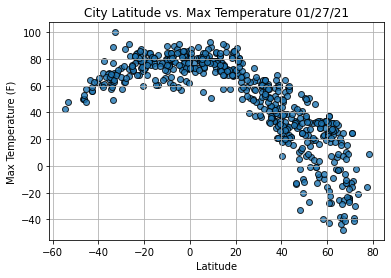

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

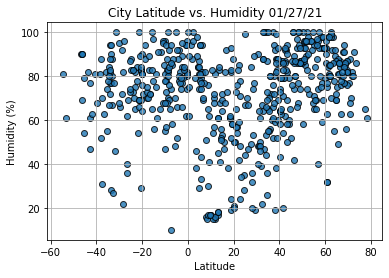

In [39]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

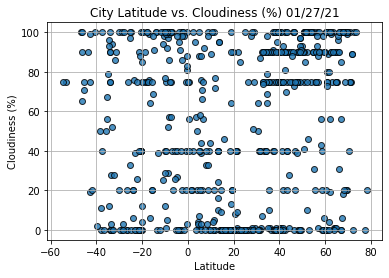

In [40]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

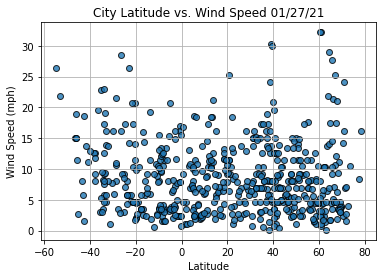

In [41]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [42]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [43]:
index13 = city_data_df.loc[13]
index13

City                      Rikitea
Country                        PF
Date          2021-01-27 20:33:11
Lat                      -23.1203
Lng                      -134.969
Max Temp                    79.34
Humidity                       75
Cloudiness                     39
Wind Speed                  14.18
Name: 13, dtype: object

In [44]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4       True
       ...  
561     True
562     True
563    False
564     True
565     True
Name: Lat, Length: 566, dtype: bool

In [45]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kogon,UZ,2021-01-27 20:33:10,39.7228,64.5517,30.20,86,0,4.61
1,Victoria,HK,2021-01-27 20:33:10,22.2855,114.1577,63.00,85,0,1.01
4,Severo-Kurilsk,RU,2021-01-27 20:32:10,50.6789,156.1250,26.71,95,100,14.00
5,Norman Wells,CA,2021-01-27 20:33:10,65.2820,-126.8329,-25.60,75,75,4.45
6,Arman,RU,2021-01-27 20:33:10,59.7000,150.1667,-15.52,79,0,10.54


In [46]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

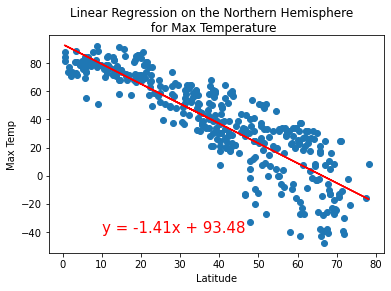

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plt.suptitle("Linear Regression on the Northern Hemisphere\n for Max Temperature")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-40))

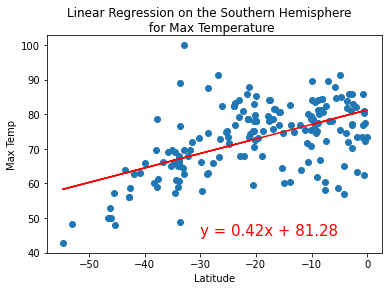

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plt.suptitle("Linear Regression on the Southern Hemisphere\n for Max Temperature")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-30,45))

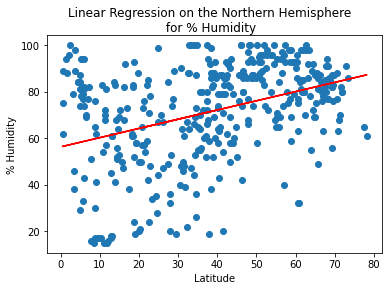

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plt.suptitle("Linear Regression on the Northern Hemisphere\n for % Humidity")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

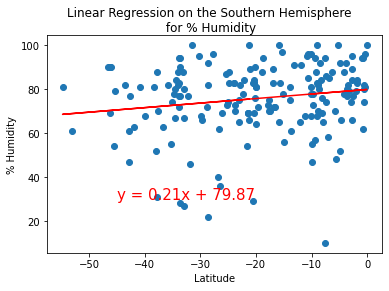

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plt.suptitle("Linear Regression on the Southern Hemisphere\n for % Humidity")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-45,30))

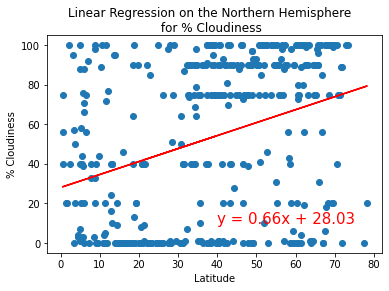

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plt.suptitle("Linear Regression on the Northern Hemisphere\n for % Cloudiness")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))



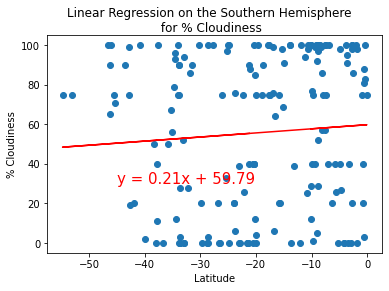

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plt.suptitle("Linear Regression on the Southern Hemisphere\n for % Cloudiness")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-45,30))

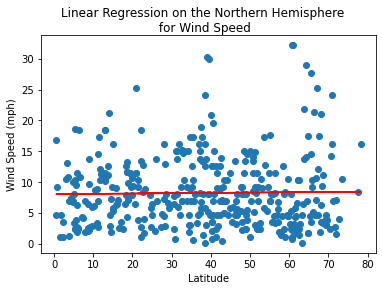

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plt.suptitle("Linear Regression on the Northern Hemisphere\n for Wind Speed")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed (mph)', 'Wind Speed (mph)',(10,35))



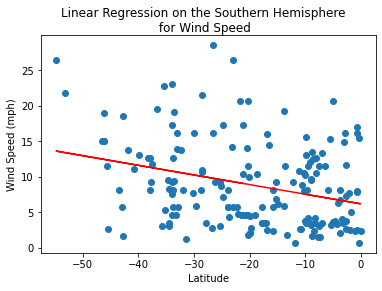

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plt.suptitle("Linear Regression on the Southern Hemisphere\n for Wind Speed")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed (mph)', 'Wind Speed (mph)',(-50,32))